In [71]:

pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

import os  
  

In [84]:
folder_path = "C:\\Users\\sneha R\\OneDrive - Acacia Analytics\\Documents\\vehicle _valuation\\Data\\Raw_data\\Valuation Data"
folder_path1 = "C:\\Users\\sneha R\\OneDrive - Acacia Analytics\\Documents\\vehicle _valuation\\Data\\Raw_data\\Aution"
folder_path2= "C:\\Users\\sneha R\\OneDrive - Acacia Analytics\\Documents\\vehicle _valuation\\Data\\Raw_data\\eezy_car_valuation"

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):  
        file_path = os.path.join(folder_path, filename)
        valuation = pd.read_csv(file_path,encoding="latin-1")
for filename in os.listdir(folder_path1):
    if filename.endswith(".csv"):  
        file_path1 = os.path.join(folder_path1, filename)
        Aution = pd.read_csv(file_path1,encoding="latin-1")
for filename in os.listdir(folder_path2):
    if filename.endswith(".csv"):  
        file_path2 = os.path.join(folder_path2, filename)
        eezy_car_valuation = pd.read_csv(file_path2,encoding="latin-1")
     
print(valuation.describe)


C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\3426057939.py:8: DtypeWarning: Columns (5,13,37,38,54,70,71,72,73,74,75,76,77,79,80,97,98,99,100,101,102,103,104,105,106,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  valuation = pd.read_csv(file_path,encoding="latin-1")
C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\3426057939.py:8: DtypeWarning: Columns (4,6,8,9,10,11,15,17,19,20,21,22,23,24,25,26,27,31,42,43,44,45,46,48,49,50,53,54,56,57,58,60,62,75,100,102) have mixed types. Specify dtype option on import or set low_memory=False.
  valuation = pd.read_csv(file_path,encoding="latin-1")


<bound method NDFrame.describe of        SYSID REGISTRATION       FIRST_NAME      SUR_NAME     ID_NO  KRA_PIN  \
0          5       KCS485              NaN           NaN       NaN      NaN   
1          6      UAR372E              DRU         UNITS         0      NaN   
2          7      UBE618S            MERCY    ALITUBEERA        02      NaN   
3          4      UBJ867E        EEZY TEST          TEST         0      NaN   
4          8      UAU997S           ESTHER      NAMAKULA        03      NaN   
...      ...          ...              ...           ...       ...      ...   
16445  16400      UAX256F          DERRICK          WERE  10183207      NaN   
16446  16446      UAU709Y   ISAAC CHRISPUS        KALAMU         0      NaN   
16447  16457      UBF038D    WALYOMBEKAINA          MUSA        22      NaN   
16448  16459      UBP589F          BESIGYE  APOLLO JAMES       333      NaN   
16449  16460      UAL882M        MOHAMMED       MUNWANYI       134      NaN   

           MOBILE

In [50]:
valuation_cleaned = valuation.dropna(axis=1, how='all')
Aution_cleaned = Aution.dropna(axis=1, how='all')
eezy_car_valuation_cleaned = eezy_car_valuation.dropna(axis=1, how='all')

#print(valuation_cleaned.info())
print(valuation_cleaned.describe())
#print(Aution_cleaned)
#print(eezy_car_valuation_cleaned)


              SYSID      KRA_PIN      YEAR_MAN    FORCE_COST   ACTUAL_COST  \
count  16450.000000  1285.000000  14530.000000  1.414800e+04  1.414800e+04   
mean    8234.920486     1.091051   2004.952443  2.176070e+07  3.131810e+07   
std     4749.692249     3.404041      4.996138  1.890278e+07  2.642846e+07   
min        4.000000     0.000000   1974.000000  0.000000e+00  0.000000e+00   
25%     4123.250000     1.000000   2002.000000  1.200000e+07  1.700000e+07   
50%     8235.500000     1.000000   2006.000000  1.700000e+07  2.400000e+07   
75%    12347.750000     1.000000   2008.000000  2.450000e+07  3.500000e+07   
max    16460.000000   123.000000   2023.000000  6.500000e+08  4.300000e+08   

            USER_ID      AGENT_ID    R_API      EXCE_TB  BOOKING_AGENT  \
count  16448.000000  16449.000000  14139.0  2136.000000    9064.000000   
mean      30.916646    309.251991      1.0    30.994850     325.021514   
std       78.562640    114.843357      0.0    15.034152     134.362290   
m

In [85]:
import re
# checking for valuation completed status 
filtered_valuation = valuation_cleaned [(valuation_cleaned['STATUS']=='complete' )| (valuation_cleaned['STATUS']=='Completed') ]
filtered_valuation.rename(columns={'REGISTRATION': 'Reg No'}, inplace=True)
# Function to remove characters and special characters
def clean_numeric(value):
    # Remove non-numeric characters using regular expression
    cleaned_value = re.sub(r"[^0-9.]", "", str(value))
    # Convert to numeric (if possible)
    try:
        cleaned_value = float(cleaned_value)
    except ValueError:
        cleaned_value = None
    return cleaned_value
# Function to extract the first word
def get_first_word(text):
    words = text.split()
    return words[0]
filtered_valuation['EST_COST'] = filtered_valuation['EST_COST'].apply(clean_numeric)
filtered_valuation['ODOMETER'] =filtered_valuation['ODOMETER'].apply(clean_numeric)
filtered_valuation['MAKE_MODEL']= filtered_valuation['MAKE_MODEL'].astype(str)
filtered_valuation['MAKE_MODEL']=filtered_valuation['MAKE_MODEL'].apply(get_first_word)


filtered_valuation['COLOR']= filtered_valuation['COLOR'].astype(str)
filtered_valuation['difference_principle_valuations']=(filtered_valuation['ACTUAL_COST']-filtered_valuation['EST_COST']).astype(str)
filtered_valuation['difference_forced_valuations']=(filtered_valuation['EST_COST']-filtered_valuation['FORCE_COST']).astype(str)
#valuation_final_data=filtered_valuation.dropna(subset=['FORCE_COST','ACTUAL_COST'])
#print(filtered_valuation.describe())
#print(Aution_cleaned.columns)
#print(valuation_final_data['difference_forced_valuations'].mean())
filtered_valuation['EST_COST'].dropna()
filtered_valuation.isnull().sum()
#final_data=filtered_valuation[['ODOMETER','COLOR']]


C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\1139965185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_valuation.rename(columns={'REGISTRATION': 'Reg No'}, inplace=True)
C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\1139965185.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_valuation['EST_COST'] = filtered_valuation['EST_COST'].apply(clean_numeric)
C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\1139965185.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

SYSID                                  0
Reg No                                 0
FIRST_NAME                             0
SUR_NAME                               0
ID_NO                                  0
                                   ...  
PMODE                              10211
BUSINESS_SOURCE                        0
BOOKING_AGENT_1                        0
difference_principle_valuations        0
difference_forced_valuations           0
Length: 87, dtype: int64

In [86]:

from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(filtered_valuation)
columns_to_encode=['COLOR','FUEL_TYPE','YEAR_MAN','TRANS','COUNTRY','MAKE_MODEL']
#encoder = OneHotEncoder()

le = LabelEncoder()
filtered_valuation['COLOR_encoded'] = le.fit_transform(filtered_valuation['COLOR'])
filtered_valuation['FUEL_TYPE_encoded'] = le.fit_transform(filtered_valuation['FUEL_TYPE'])
filtered_valuation['YEAR_MAN_encoded'] = le.fit_transform(filtered_valuation['YEAR_MAN'])
filtered_valuation['TRANS_encoded'] = le.fit_transform(filtered_valuation['TRANS'])
filtered_valuation['COUNTRY_encoded'] = le.fit_transform(filtered_valuation['COUNTRY'])
filtered_valuation['MAKE_MODEL_encoded'] = le.fit_transform(filtered_valuation['MAKE_MODEL'])
filtered_valuation['ENGINE_MODEL_encoded'] = le.fit_transform(filtered_valuation['ENGINE_MODEL'])
#encoded_data = encoder.fit_transform(df[columns_to_encode])
#df=filtered_valuation[['COLOR','FUEL_TYPE','YEAR_MAN','TRANS','COUNTRY','MAKE_MODEL']]
#df_encoded=pd.concat([df.drop(columns_to_encode, axis=1), pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())], axis=1)

print(filtered_valuation['FUEL_TYPE_encoded'])
final_data=filtered_valuation[['ODOMETER','COLOR','YEAR_MAN','TRANS','ENGINE','GENERAL','EST_COST','FORCE_COST','ACTUAL_COST','STATUS','COUNTRY','ENGINE_MODEL','FUEL_TYPE','MAKE_MODEL','BUSINESS_SOURCE',
'COLOR_encoded','FUEL_TYPE_encoded','ENGINE_MODEL_encoded','YEAR_MAN_encoded','TRANS_encoded','COUNTRY_encoded','MAKE_MODEL_encoded','difference_principle_valuations','difference_forced_valuations']]
print(final_data.dropna())

5        8
12       3
14       3
18       1
22       1
        ..
16441    9
16443    9
16445    9
16446    9
16447    9
Name: FUEL_TYPE_encoded, Length: 14146, dtype: int64
       ODOMETER         COLOR  YEAR_MAN          TRANS  \
5       70000.0        Maroon    2007.0   Automatic      
14     258098.0      DARK RED    2007.0      Automatic   
23      85468.0         Black    2005.0  AUTOMATIC 2WD   
28     102064.0          GRAY    2006.0  AUTOMATIC 2WD   
30     129542.0       Silver     1998.0  AUTOMATIC 2WD   
...         ...           ...       ...            ...   
11985   40465.0        White     2010.0  AUTOMATIC 4WD   
12058  110443.0           Red    2007.0  AUTOMATIC 2WD   
12059   51692.0  Pearl White     2008.0  AUTOMATIC 2WD   
12060  120684.0       Silver     2010.0  AUTOMATIC 2WD   
14369  124041.0          Grey    2011.0  AUTOMATIC 4WD   

                                                  ENGINE GENERAL     EST_COST  \
5                                       well mai

C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\1043758362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_valuation['COLOR_encoded'] = le.fit_transform(filtered_valuation['COLOR'])
C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\1043758362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_valuation['FUEL_TYPE_encoded'] = le.fit_transform(filtered_valuation['FUEL_TYPE'])
C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\1043758362.py:9: SettingWithCopyWarning: 
A value is t

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

corelate_data=final_data[['ODOMETER','COLOR_encoded','FUEL_TYPE_encoded','ENGINE_MODEL_encoded','YEAR_MAN_encoded','TRANS_encoded','MAKE_MODEL_encoded','difference_principle_valuations','difference_forced_valuations','FORCE_COST','ACTUAL_COST','EST_COST']]
#print(corelate_data.dtypes)
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(corelate_data)

# Convert back to DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=corelate_data.columns)
# Create an instance of StandardScaler


C:\Users\sneha R\AppData\Local\Temp\ipykernel_27448\1931168053.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corelate_data['FORCE_COST'], bins=30)


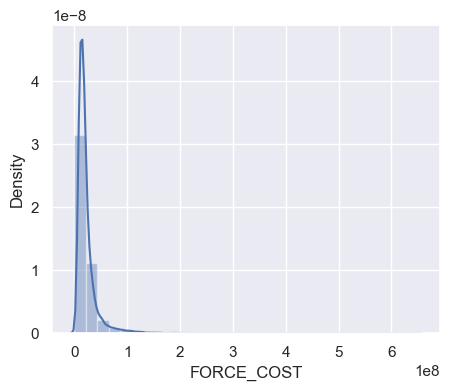

In [88]:
sns.set(rc={'figure.figsize':(5, 4)})
sns.distplot(corelate_data['FORCE_COST'], bins=30)
plt.show()


<Axes: >

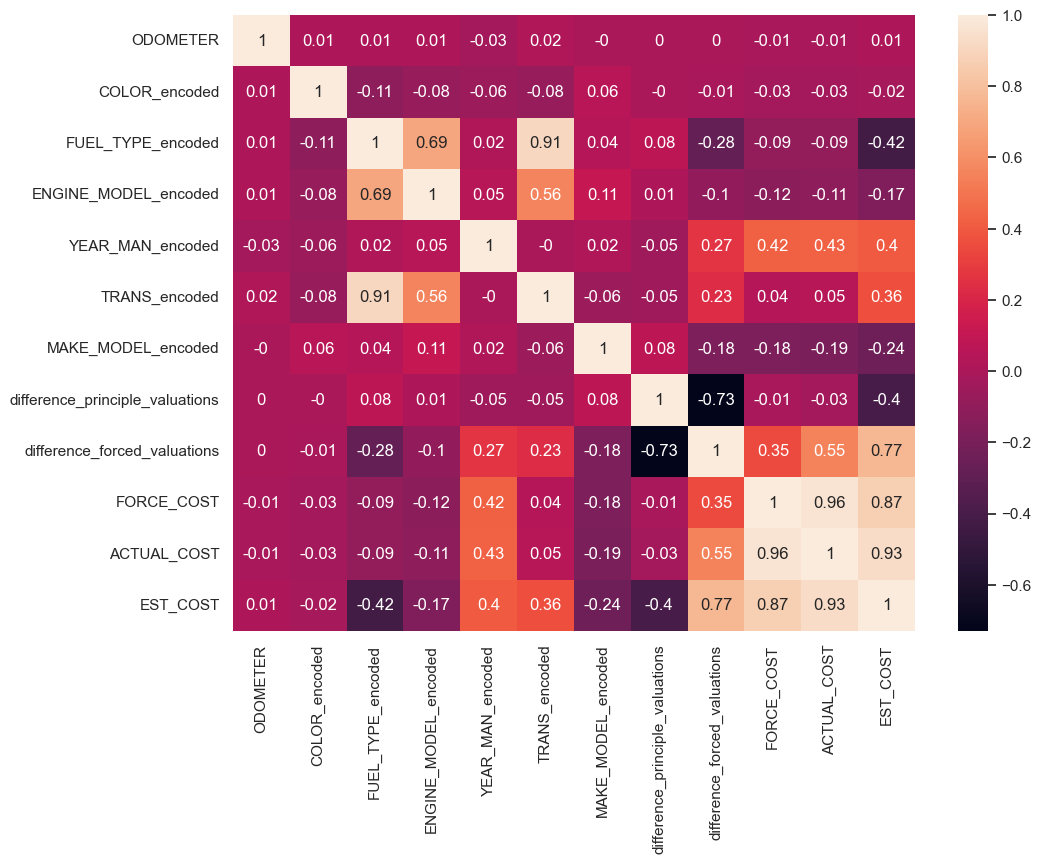

In [89]:
sns.set(rc={'figure.figsize':(11, 8)})
corr_mat = corelate_data.corr().round(2)
sns.heatmap(data=corr_mat, annot=True)

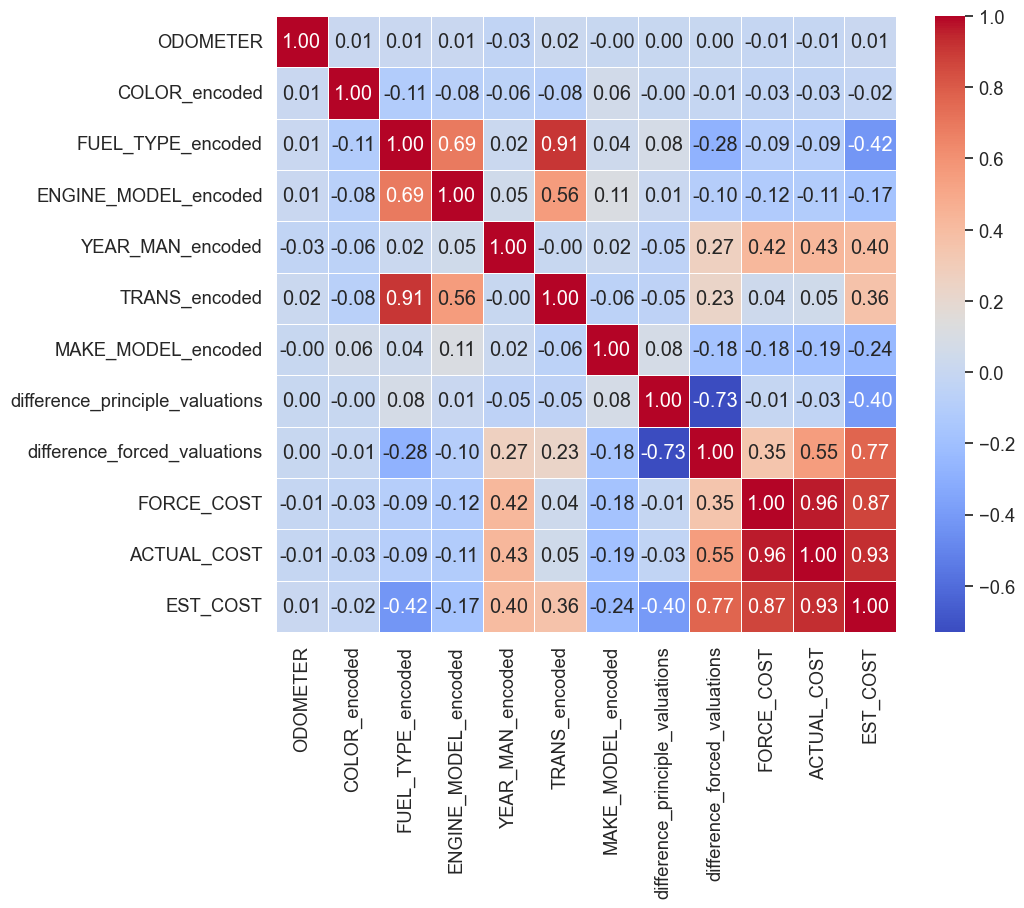

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing data

# Calculate the correlation matrix
corr_mat = corelate_data.corr().round(2)

# Display the correlation matrix as a table
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(data=corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

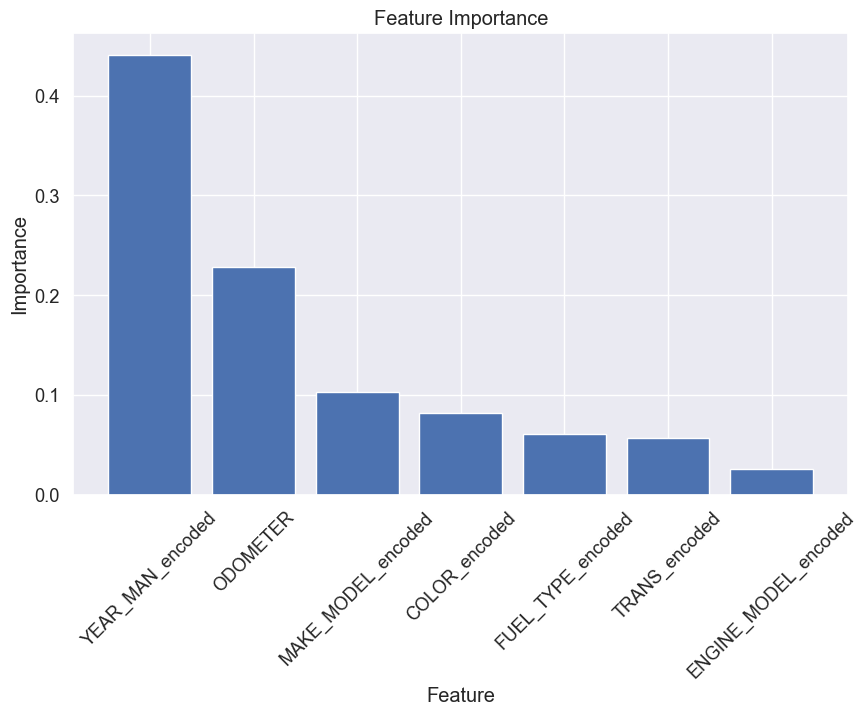

In [92]:
# Separate features and target variable
X = corelate_data[['ODOMETER','COLOR_encoded','FUEL_TYPE_encoded','ENGINE_MODEL_encoded','YEAR_MAN_encoded','TRANS_encoded','MAKE_MODEL_encoded']]
y = corelate_data['ACTUAL_COST']

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# Split into features and target
X = filtered_valuation.drop('target_column', axis=1)
y = filtered_valuation['target_column']
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_   


# Select features based on a threshold
selector = SelectFromModel(rf, threshold='median')
X_selected = selector.fit_transform(X, y)

SyntaxError: invalid non-printable character U+00A0 (1222626630.py, line 12)

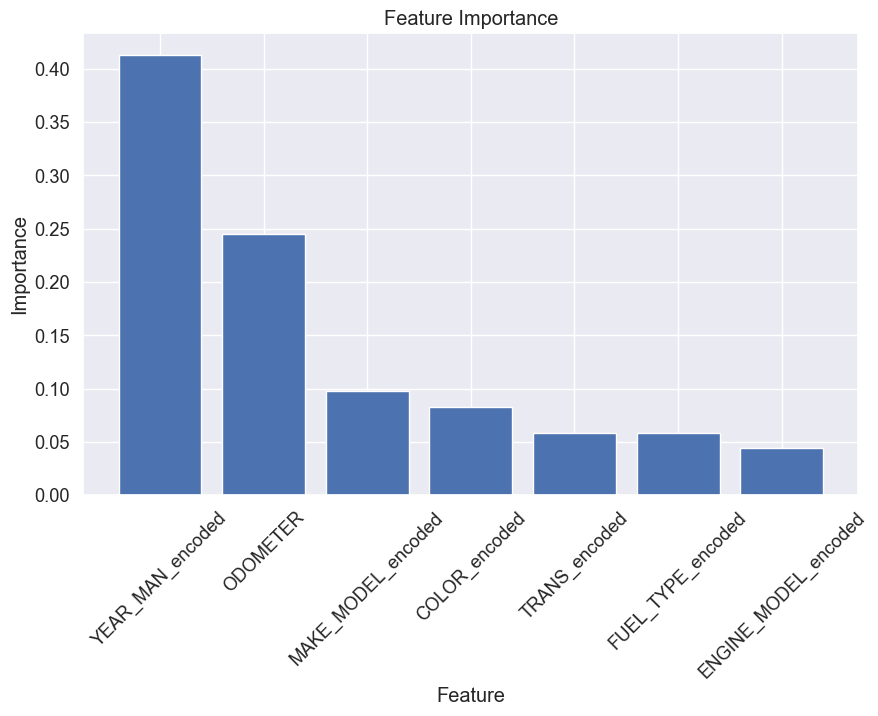

In [78]:
X = corelate_data[['ODOMETER','COLOR_encoded','FUEL_TYPE_encoded','ENGINE_MODEL_encoded','YEAR_MAN_encoded','TRANS_encoded','MAKE_MODEL_encoded',]]
y = corelate_data['FORCE_COST']

# Initialize a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [94]:
print(feature_importance_df)


                Feature  Importance
4      YEAR_MAN_encoded    0.440576
0              ODOMETER    0.228882
6    MAKE_MODEL_encoded    0.103358
1         COLOR_encoded    0.082513
2     FUEL_TYPE_encoded    0.060974
5         TRANS_encoded    0.057564
3  ENGINE_MODEL_encoded    0.026134
